In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib.lines import Line2D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("Dry_Eye_Dataset_raw.csv")

In [4]:
df.info()
# Displays we have 26 columns
# Each column has 20,000 values. No-null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

In [5]:
# Create a copy
# PP = Pre-Processed
df_PP = df.copy()

df_PP.to_csv('Dry_Eye_Dataset_PreProcessed.csv', index=False)
print("\nPre-Processed dataset saved to 'Dry_Eye_Dataset_PreProcessed.csv'")


Pre-Processed dataset saved to 'Dry_Eye_Dataset_PreProcessed.csv'


# Exploratory Data Analysis

In [6]:
# List columns in the dataframe
df_PP.columns.tolist()

['Gender',
 'Age',
 'Sleep duration',
 'Sleep quality',
 'Stress level',
 'Blood pressure',
 'Heart rate',
 'Daily steps',
 'Physical activity',
 'Height',
 'Weight',
 'Sleep disorder',
 'Wake up during night',
 'Feel sleepy during day',
 'Caffeine consumption',
 'Alcohol consumption',
 'Smoking',
 'Medical issue',
 'Ongoing medication',
 'Smart device before bed',
 'Average screen time',
 'Blue-light filter',
 'Discomfort Eye-strain',
 'Redness in eye',
 'Itchiness/Irritation in eye',
 'Dry Eye Disease']

In [7]:
df_PP.info()
# Displays we have 26 columns
# Each column has 20,000 values. No-null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

In [8]:
# Display the first 5 rows of the dataframe 
df_PP.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


In [9]:
# Count the number of missing values in dataframe
df_PP.isna().sum()

Gender                         0
Age                            0
Sleep duration                 0
Sleep quality                  0
Stress level                   0
Blood pressure                 0
Heart rate                     0
Daily steps                    0
Physical activity              0
Height                         0
Weight                         0
Sleep disorder                 0
Wake up during night           0
Feel sleepy during day         0
Caffeine consumption           0
Alcohol consumption            0
Smoking                        0
Medical issue                  0
Ongoing medication             0
Smart device before bed        0
Average screen time            0
Blue-light filter              0
Discomfort Eye-strain          0
Redness in eye                 0
Itchiness/Irritation in eye    0
Dry Eye Disease                0
dtype: int64

In [10]:
# Generate descriptive statistics for dataset 
df_PP.describe()

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,31.422800,6.998245,2.997250,2.993750,79.912200,10536.900000,90.069750,174.865900,74.891850,5.519885
std,8.103717,1.731723,1.412283,1.407235,11.808279,5752.729186,52.317283,14.719903,14.733839,2.606305
min,18.000000,4.000000,1.000000,1.000000,60.000000,1000.000000,0.000000,150.000000,50.000000,1.000000
25%,24.000000,5.500000,2.000000,2.000000,70.000000,6000.000000,45.000000,162.000000,62.000000,3.300000
50%,31.000000,7.000000,3.000000,3.000000,80.000000,11000.000000,91.000000,175.000000,75.000000,5.500000
75%,39.000000,8.500000,4.000000,4.000000,90.000000,16000.000000,135.000000,188.000000,88.000000,7.800000
max,45.000000,10.000000,5.000000,5.000000,100.000000,20000.000000,180.000000,200.000000,100.000000,10.000000


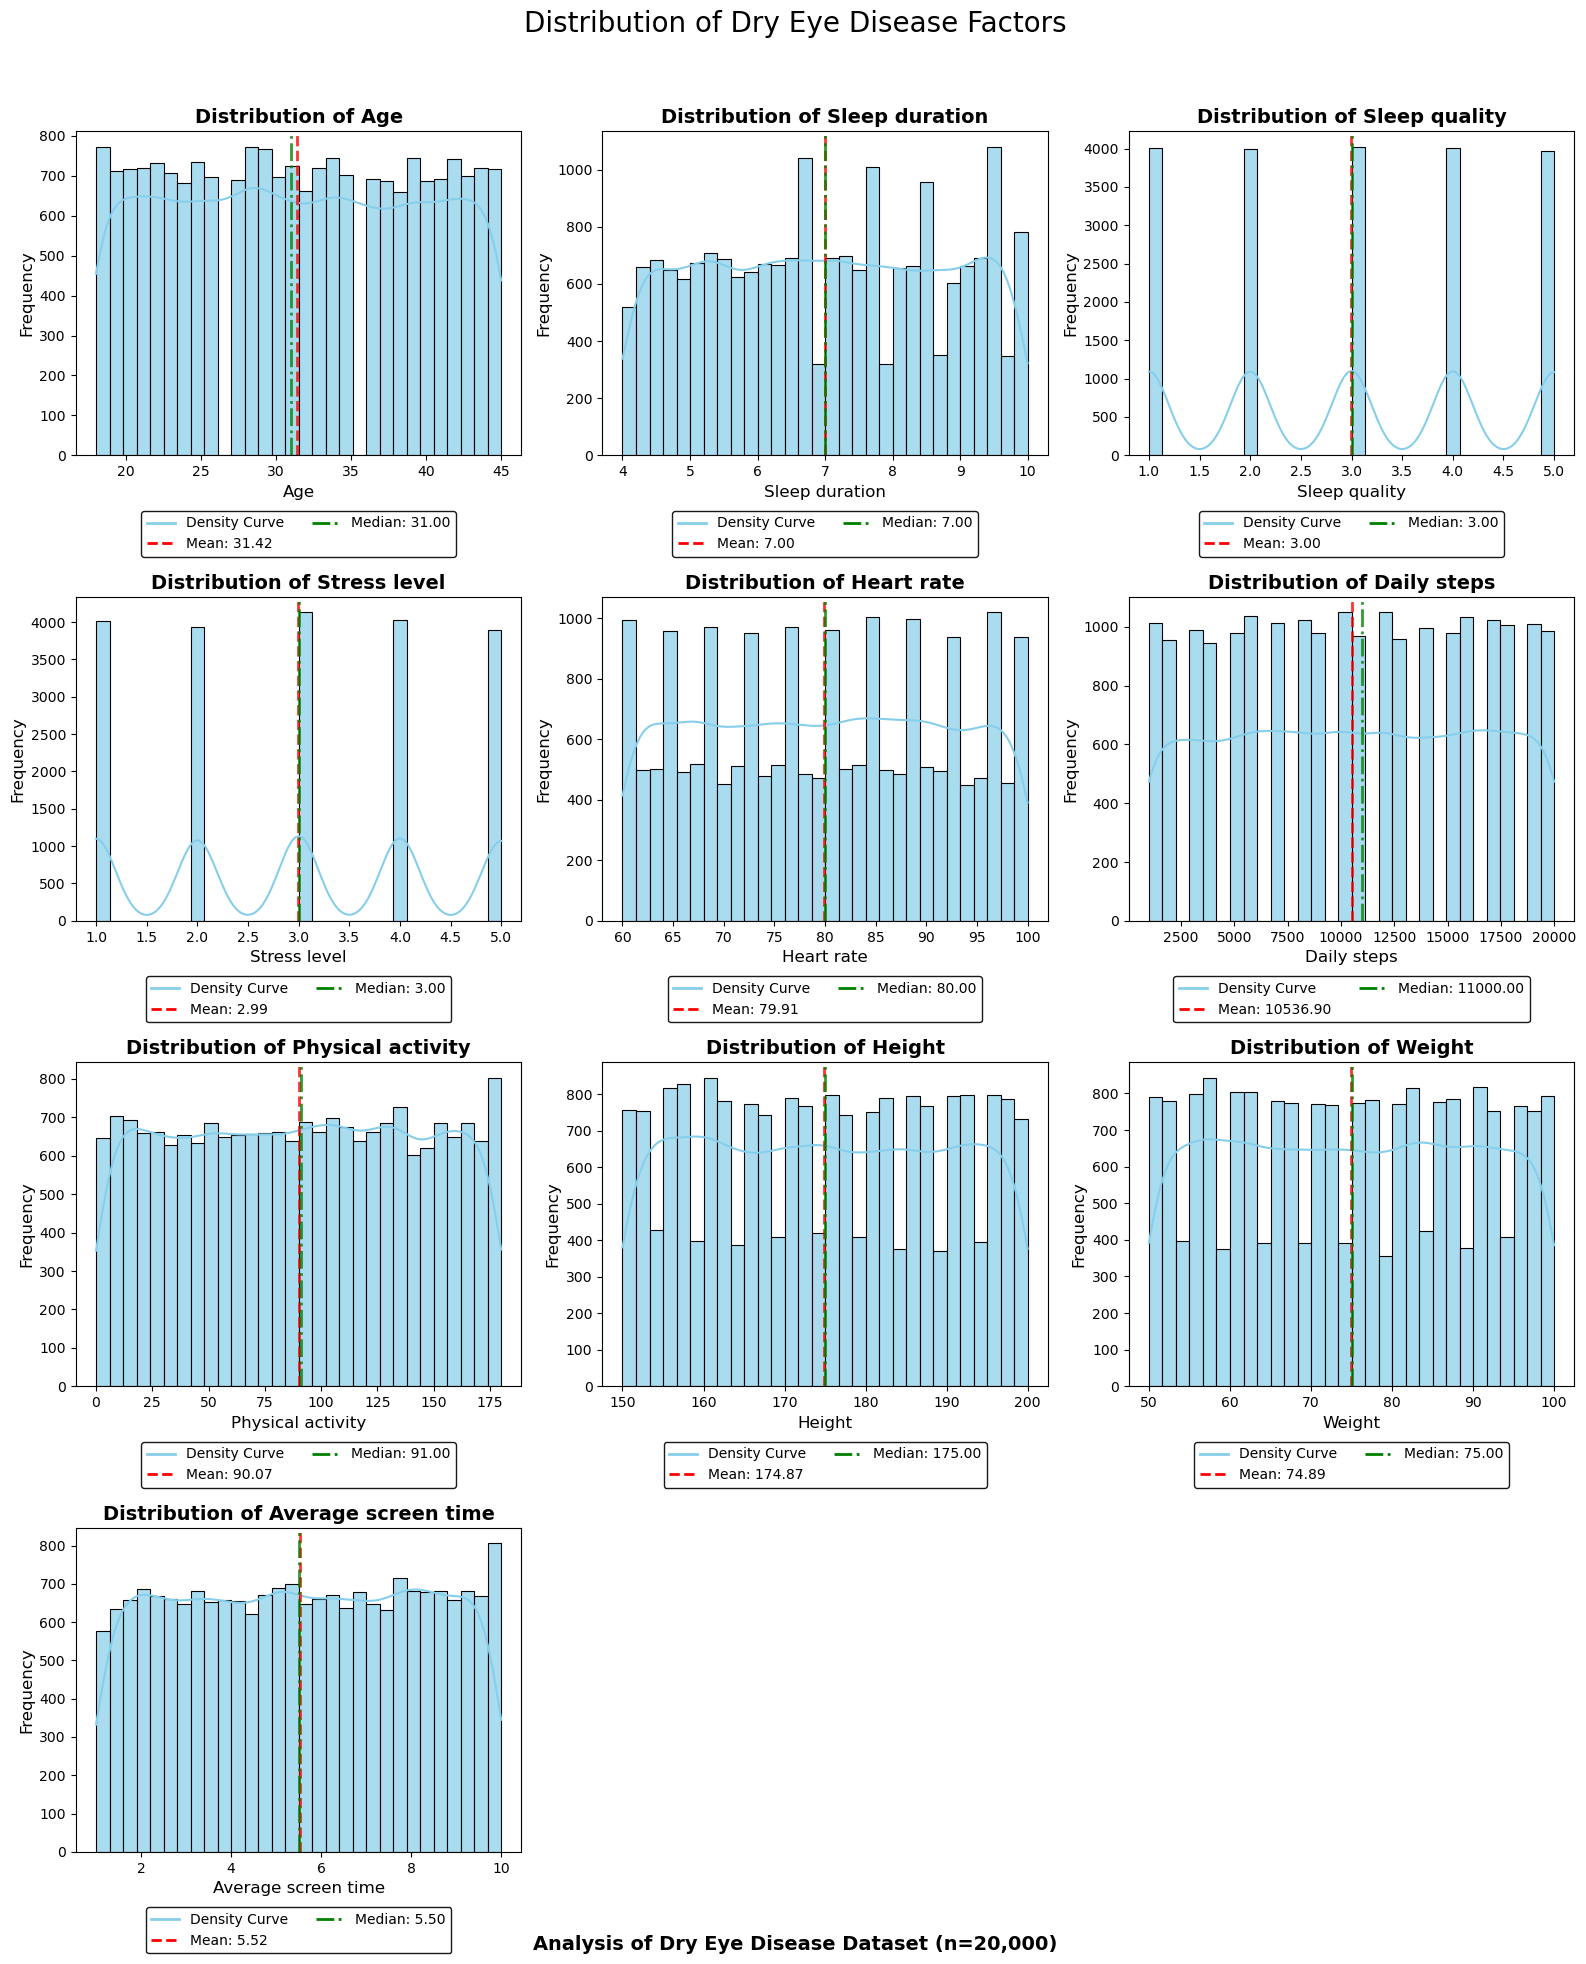

In [11]:
# Select only numeric columns for histograms
sns.set_palette("pastel")

# Select only numeric columns for histograms
numerical_col=df.select_dtypes(include="number").columns.tolist()

# Create subplots with better spacing
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))
axes = axes.flatten()

# Plot each numeric column as a histogram with improved styling
for i, column in enumerate(numerical_col):
    if i < len(axes):
        # Create histogram with density curve
        sns.histplot(df_PP[column], bins=30, kde=True, ax=axes[i], 
                    color='skyblue', edgecolor='black', alpha=0.7)

        # Improve title and labels
        axes[i].set_title(f'Distribution of {column}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(column, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)
        
        # Add mean and median lines
        mean = df_PP[column].mean()
        median = df_PP[column].median()
        axes[i].axvline(mean, color='red', linestyle='--', alpha=0.8, linewidth=2)
        axes[i].axvline(median, color='green', linestyle='-.', alpha=0.8, linewidth=2)
        
        # Create proper legend elements
        legend_elements = [
            Line2D([0], [0], color='skyblue', lw=2, label='Density Curve'),
            Line2D([0], [0], color='red', lw=2, linestyle='--', label=f'Mean: {mean:.2f}'),
            Line2D([0], [0], color='green', lw=2, linestyle='-.', label=f'Median: {median:.2f}')
        ]
        
        # Add legend outside the plot area (below the x-axis)
        axes[i].legend(handles=legend_elements, loc='upper center', 
                      bbox_to_anchor=(0.5, -0.15), fontsize=10, 
                      framealpha=0.9, edgecolor='black', ncol=2)

# Remove any unused subplots
for i in range(len(numerical_col), len(axes)):
    fig.delaxes(axes[i])

# Add an overall title
plt.suptitle('Distribution of Dry Eye Disease Factors', fontsize=20, y=0.98)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Add a text annotation describing the dataset
fig.text(0.5, 0.01, 'Analysis of Dry Eye Disease Dataset (n=20,000)', 
         ha='center', fontsize=14, fontweight='bold')

plt.show()

# Histogram Explanations

- The use of 30 bins allows for a more precide view of the data distibution. 
- I used 10 bins to allow for easier reading. Alternated between 10 and 45 bins for more precise analysis

1) Distribution of Age: Even distribution across the 18-45 age range. There are visible peaks at younger ages 18-23 and older ages 39-45. The mean age is 31.42 years with a median of 31 years. The data appears to be multi-modal (distribution with MULTIPLE peaks) highlighting that dry eye disease affects various age groups in the dataset. Dry eye disease does not only affect older individuals.

2) Distribution of Sleep Duration: Sleep duration ranges from 4 to 10 hours. Each bin represents approximately 8 hours of sleep. There appears to be more noticeable peaks at whole and half-hour increments (4.0, 4.5, 5.0, etc.) which are typical sreported sleep durations. The mean and median is 7.0 hours, which aligns with the recommended hours of sleep. There are peaks between 4-5.5 hours of sleep, 7-8 hours of sleep, and 9-10 hours of sleep. The gaps between these could be a highlight of natural breakpoints in sleep patterns that may show different correlations with dry eye symptoms.

3) Distribution of Sleep Quality: Sleep quality is observed on a 1-5 scale.There are 5 spikes at integer values with empty bins between them. These shows this is a discrete ordinal variable. Each spike shows the count of participants quality kevel. The mean and median is 3, which shows that particpants are having an average quality of sleep. 

4) Distribution of Stress Level: Stress level is observed on a 1-5 scale. There are 5 distinct spikes with empty bins between them. This distribution is a Likert scale measure (a rating scale to measure participants response). The mean is 2.99 and the median is 3. This shows that, approximately, the average amount of sleep for the participants is 3.

5) Distribution of Heart Rate: Heart rate is measured in the 60-100 BPM range. There are visbible peaks at values ending in 0 or 5. This could potentially be revealing physiological breakpoints related to dry eye prevalence. The mean heart rate is 79.91 BPM with the median being 80 BPM, suggesting a central tendency at the middle of the normal resting range. (A normal resting heart rate for adults ranges from 60 to 100 beats per minute - Mayo Clinic). This could reveal connections between the nervous system and tear production

6) Distribution of Daily Steps: Daily steps is measured between 1,000 and 20,000 steps. The distribution appears to be slightly uniform which represents a balanced distribution in the dataset. The mean of 10,536 steps and median of 11,000 steps highlights that approximately half of the participants reach or exceeded 10,000 steps per day. 

7) Distribution of Physical Activity: Physical activity is measured between the range 0 to 180 minutes. The distribution appears to be uniform across this range. The mean of 90.07 and median of 91 minutes indicates average activity levels are above health recommendations (AT LEAST 30 minutes per day - Mayo Clinic). Each bin represents about 5 minutes showing small spikes at common excercise durations (30,45, 60, 90 minutes).

8) Distribution of Height: Height is measured between the range 150 to 200 cm. There are slight peaks at heights ending in 0 or 5 cm, most likely due to measuring tendencies. The mean height is 174.87 cm and the median is 175 cm. This aligns with the expected average height for adults (Source: Healthline). 

9) Distribution of Weight: Weight is measured between the range 50 to 100 kg. Each bin appears to span approximately 1.45 kg. There are noticeable small peaks at weights ending in 0 ro 5.The mean weight is 74.89 kg and the median weight is 75.00 kg. The distribution appears to be relatively uniform.

10) Distribution of Average Screen Time: Average screen time is measured between the range 1 to 10 hours. The distribution appears to be relatively uniform across the range with subtle peaks for common usage patterns. Casual users have a visble peak from 1-3 hours. Moderate users have a peak from 4-6 hours. Heavy users have a peak from 7-10 hours. The mean screen time is 5.52 hours and the median is 5.5 hours indicating high daily phone usage for the participants. This is relevant given that it's known reduced blinking during screen use is a risk factor for dry eye symptoms. (Source: WebMD)

Skewness of Age: 0.01
Skipped log transformation for Age (low skew or negative values)


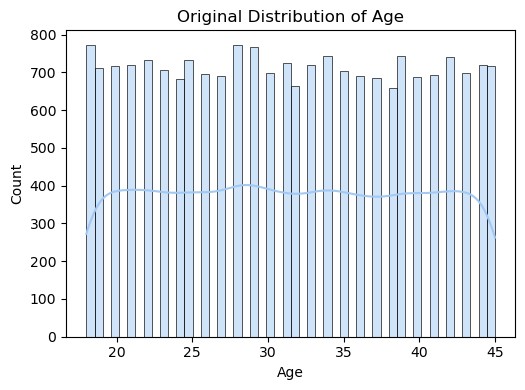

Skewness of Sleep duration: 0.00
Skipped log transformation for Sleep duration (low skew or negative values)


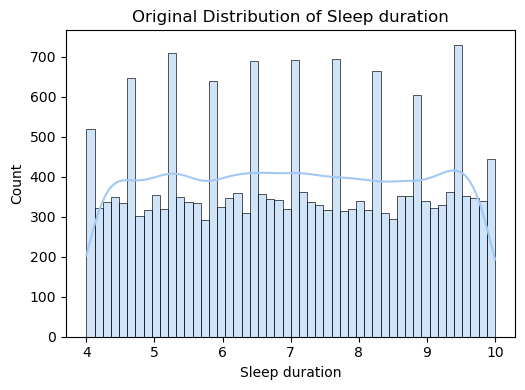

Skewness of Sleep quality: 0.00
Skipped log transformation for Sleep quality (low skew or negative values)


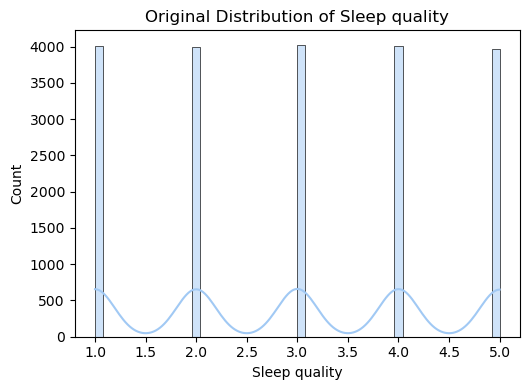

Skewness of Stress level: -0.00
Skipped log transformation for Stress level (low skew or negative values)


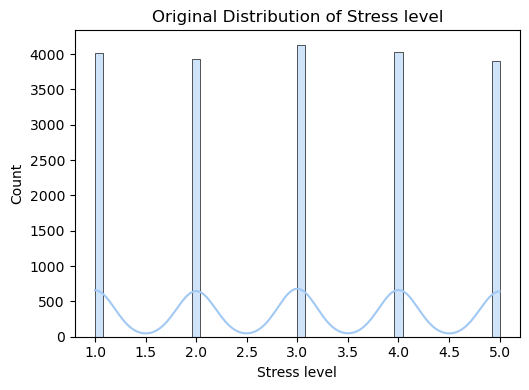

Skewness of Heart rate: 0.00
Skipped log transformation for Heart rate (low skew or negative values)


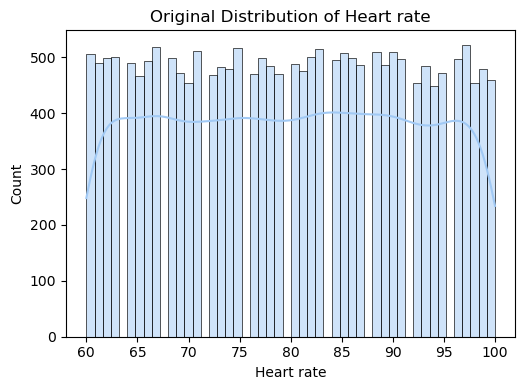

Skewness of Daily steps: -0.01
Skipped log transformation for Daily steps (low skew or negative values)


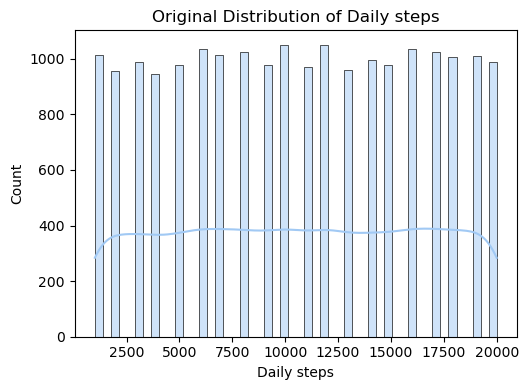

Skewness of Physical activity: -0.01
Skipped log transformation for Physical activity (low skew or negative values)


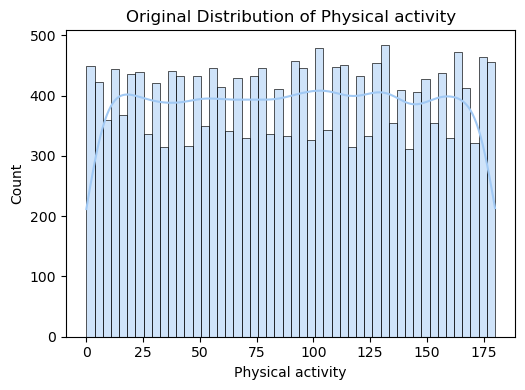

Skewness of Height: 0.01
Skipped log transformation for Height (low skew or negative values)


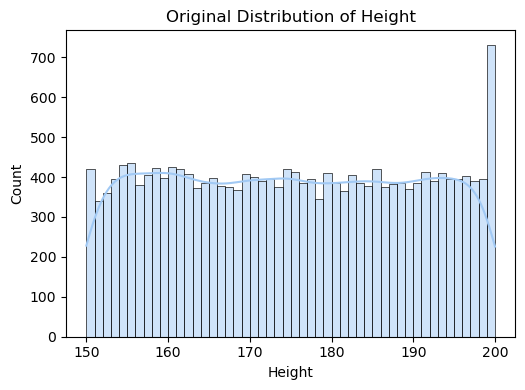

Skewness of Weight: 0.01
Skipped log transformation for Weight (low skew or negative values)


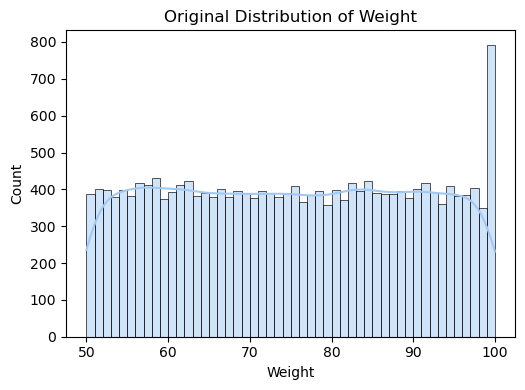

Skewness of Average screen time: -0.01
Skipped log transformation for Average screen time (low skew or negative values)


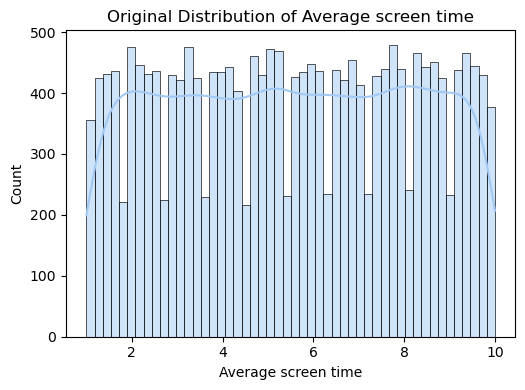

In [12]:
# Check if transformations are necessary 
for col in numerical_col:
    data = df[col].dropna()  # Drop NaNs for plotting
    skewness = data.skew()

    print(f"Skewness of {col}: {skewness:.2f}")

    # Original plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True)
    plt.title(f"Original Distribution of {col}")

    # Apply log1p only if highly skewed and values are non-negative
    if skewness > 1 and (data >= 0).all():
        transformed_data = np.log1p(data)
        plt.subplot(1, 2, 2)
        sns.histplot(transformed_data, bins=50, kde=True)
        plt.title(f"Log-Transformed Distribution of {col}")
        print(f"Applied log transformation to {col}")
    else:
        print(f"Skipped log transformation for {col} (low skew or negative values)")

    plt.tight_layout()
    plt.show()

# Summary of Boxplot Observations

- These boxplots collectively demonstrate that our dataset provides excellent coverage across all measured variables, with appropriate ranges and distributions for meaningful analysis. The absence of extreme outliers in most variables suggests reliable data collection. The comprehensive representation across different demographic, lifestyle, and health metrics positions us well to identify potential risk factors and build predictive models for dry eye disease. The balanced distributions will allow us to detect both linear relationships and potential threshold effects where risk factors may suddenly increase symptom prevalence.

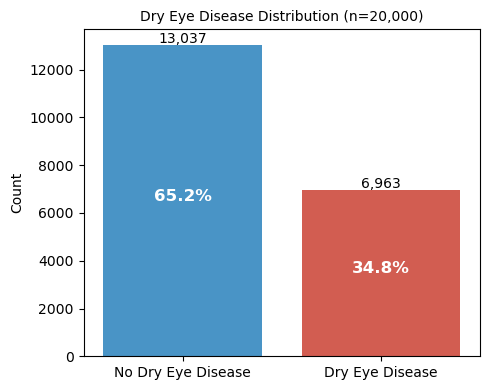

In [13]:
# Count dry eye occurrences
dry_eye_counts = df_PP['Dry Eye Disease'].value_counts()
no_dry_eye = dry_eye_counts.get(0, 0)
has_dry_eye = dry_eye_counts.get(1, 0)
total = no_dry_eye + has_dry_eye

# Create a DataFrame for the bar chart
import pandas as pd
data = pd.DataFrame({
    'Status': ['No Dry Eye Disease', 'Dry Eye Disease'],
    'Count': [no_dry_eye, has_dry_eye]
})

# Create bar chart
plt.figure(figsize=(5, 4))
ax = sns.barplot(x='Status', y='Count', data=data, palette=['#3498db', '#e74c3c'])

# Add count and percentage labels on bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percentage = (height / total) * 100
    ax.text(p.get_x() + p.get_width()/2., height + 100, 
            f'{int(height):,}', 
            ha='center')
    ax.text(p.get_x() + p.get_width()/2., height/2, 
            f'{percentage:.1f}%', 
            ha='center', color='white', fontsize=12, fontweight='bold')

# Customize the chart
plt.title(f'Dry Eye Disease Distribution (n={total:,})', fontsize=10)
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

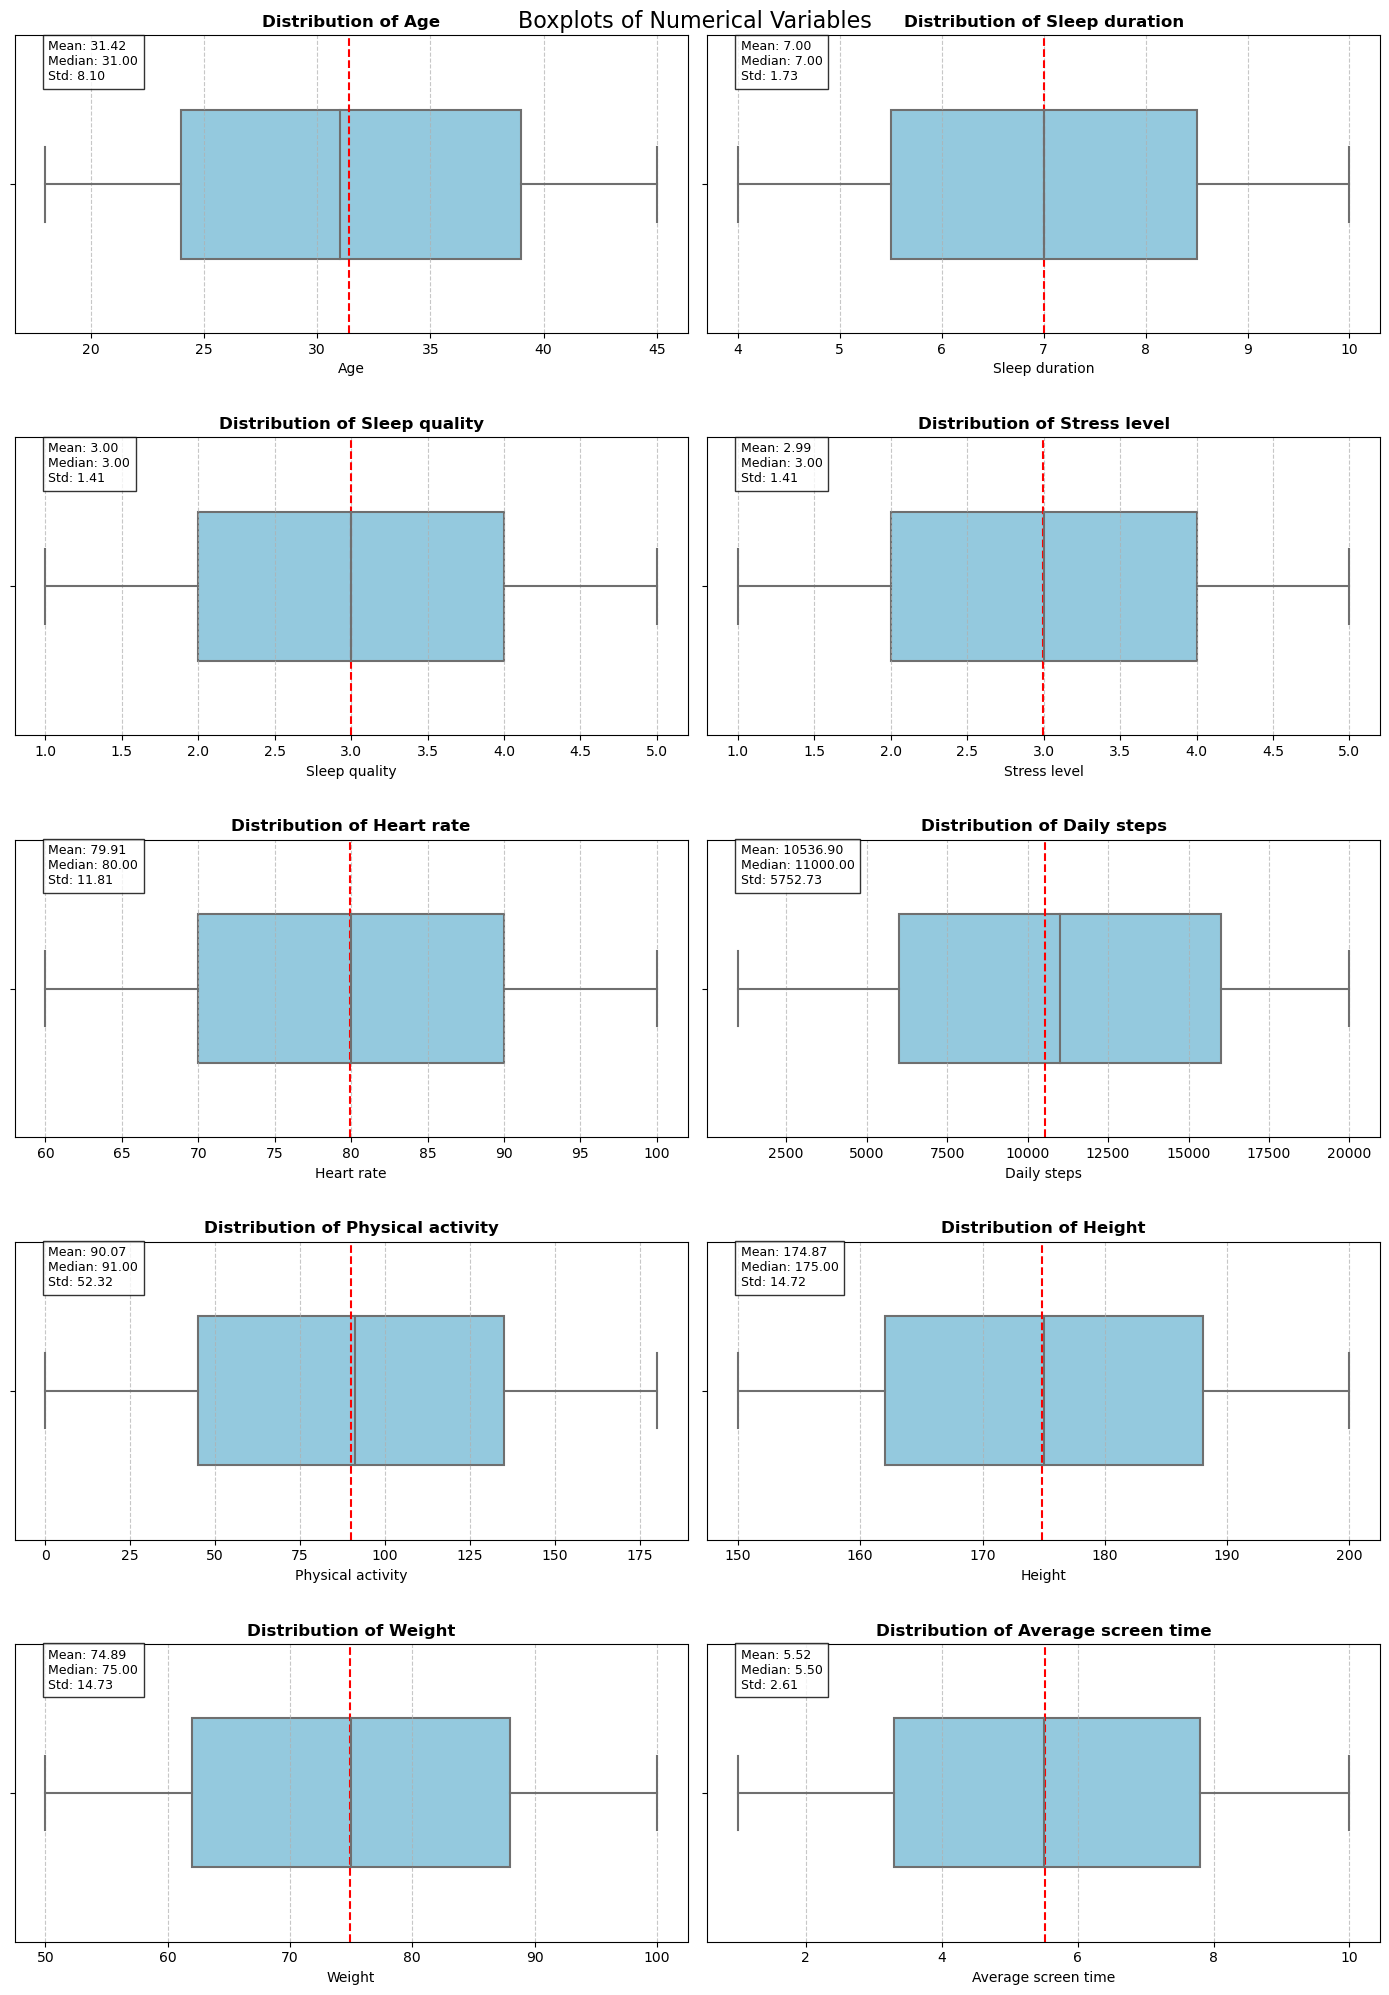

In [14]:
# Create a figure with appropriate size
plt.figure(figsize=(14, 20))  

# Create boxplots for each numerical variable
for i, col in enumerate(numerical_col, 1):
    plt.subplot(5, 2, i)  # 5 rows, 2 columns
    
    # Create boxplot
    ax = sns.boxplot(x=df_PP[col], color='skyblue', width=0.5)
    
    # Add a swarm plot overlaid for better distribution visibility (optional)
    # sns.swarmplot(x=df_PP[col], size=2, color='black', alpha=0.3)
    
    # Add title and labels
    plt.title(f"Distribution of {col}", fontweight='bold')
    plt.xlabel(col)
    
    # Add grid for easier reading
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Show mean as a line
    mean_val = df_PP[col].mean()
    plt.axvline(x=mean_val, color='red', linestyle='--', linewidth=1.5)
    
    # Add text annotation with statistics
    stats_text = f"Mean: {mean_val:.2f}\nMedian: {df_PP[col].median():.2f}\nStd: {df_PP[col].std():.2f}"
    plt.annotate(stats_text, xy=(0.05, 0.85), xycoords='axes fraction', 
                fontsize=9, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(hspace=0.35)  # Add space between subplots
plt.suptitle("Boxplots of Numerical Variables", fontsize=16, y=0.995)
plt.show()

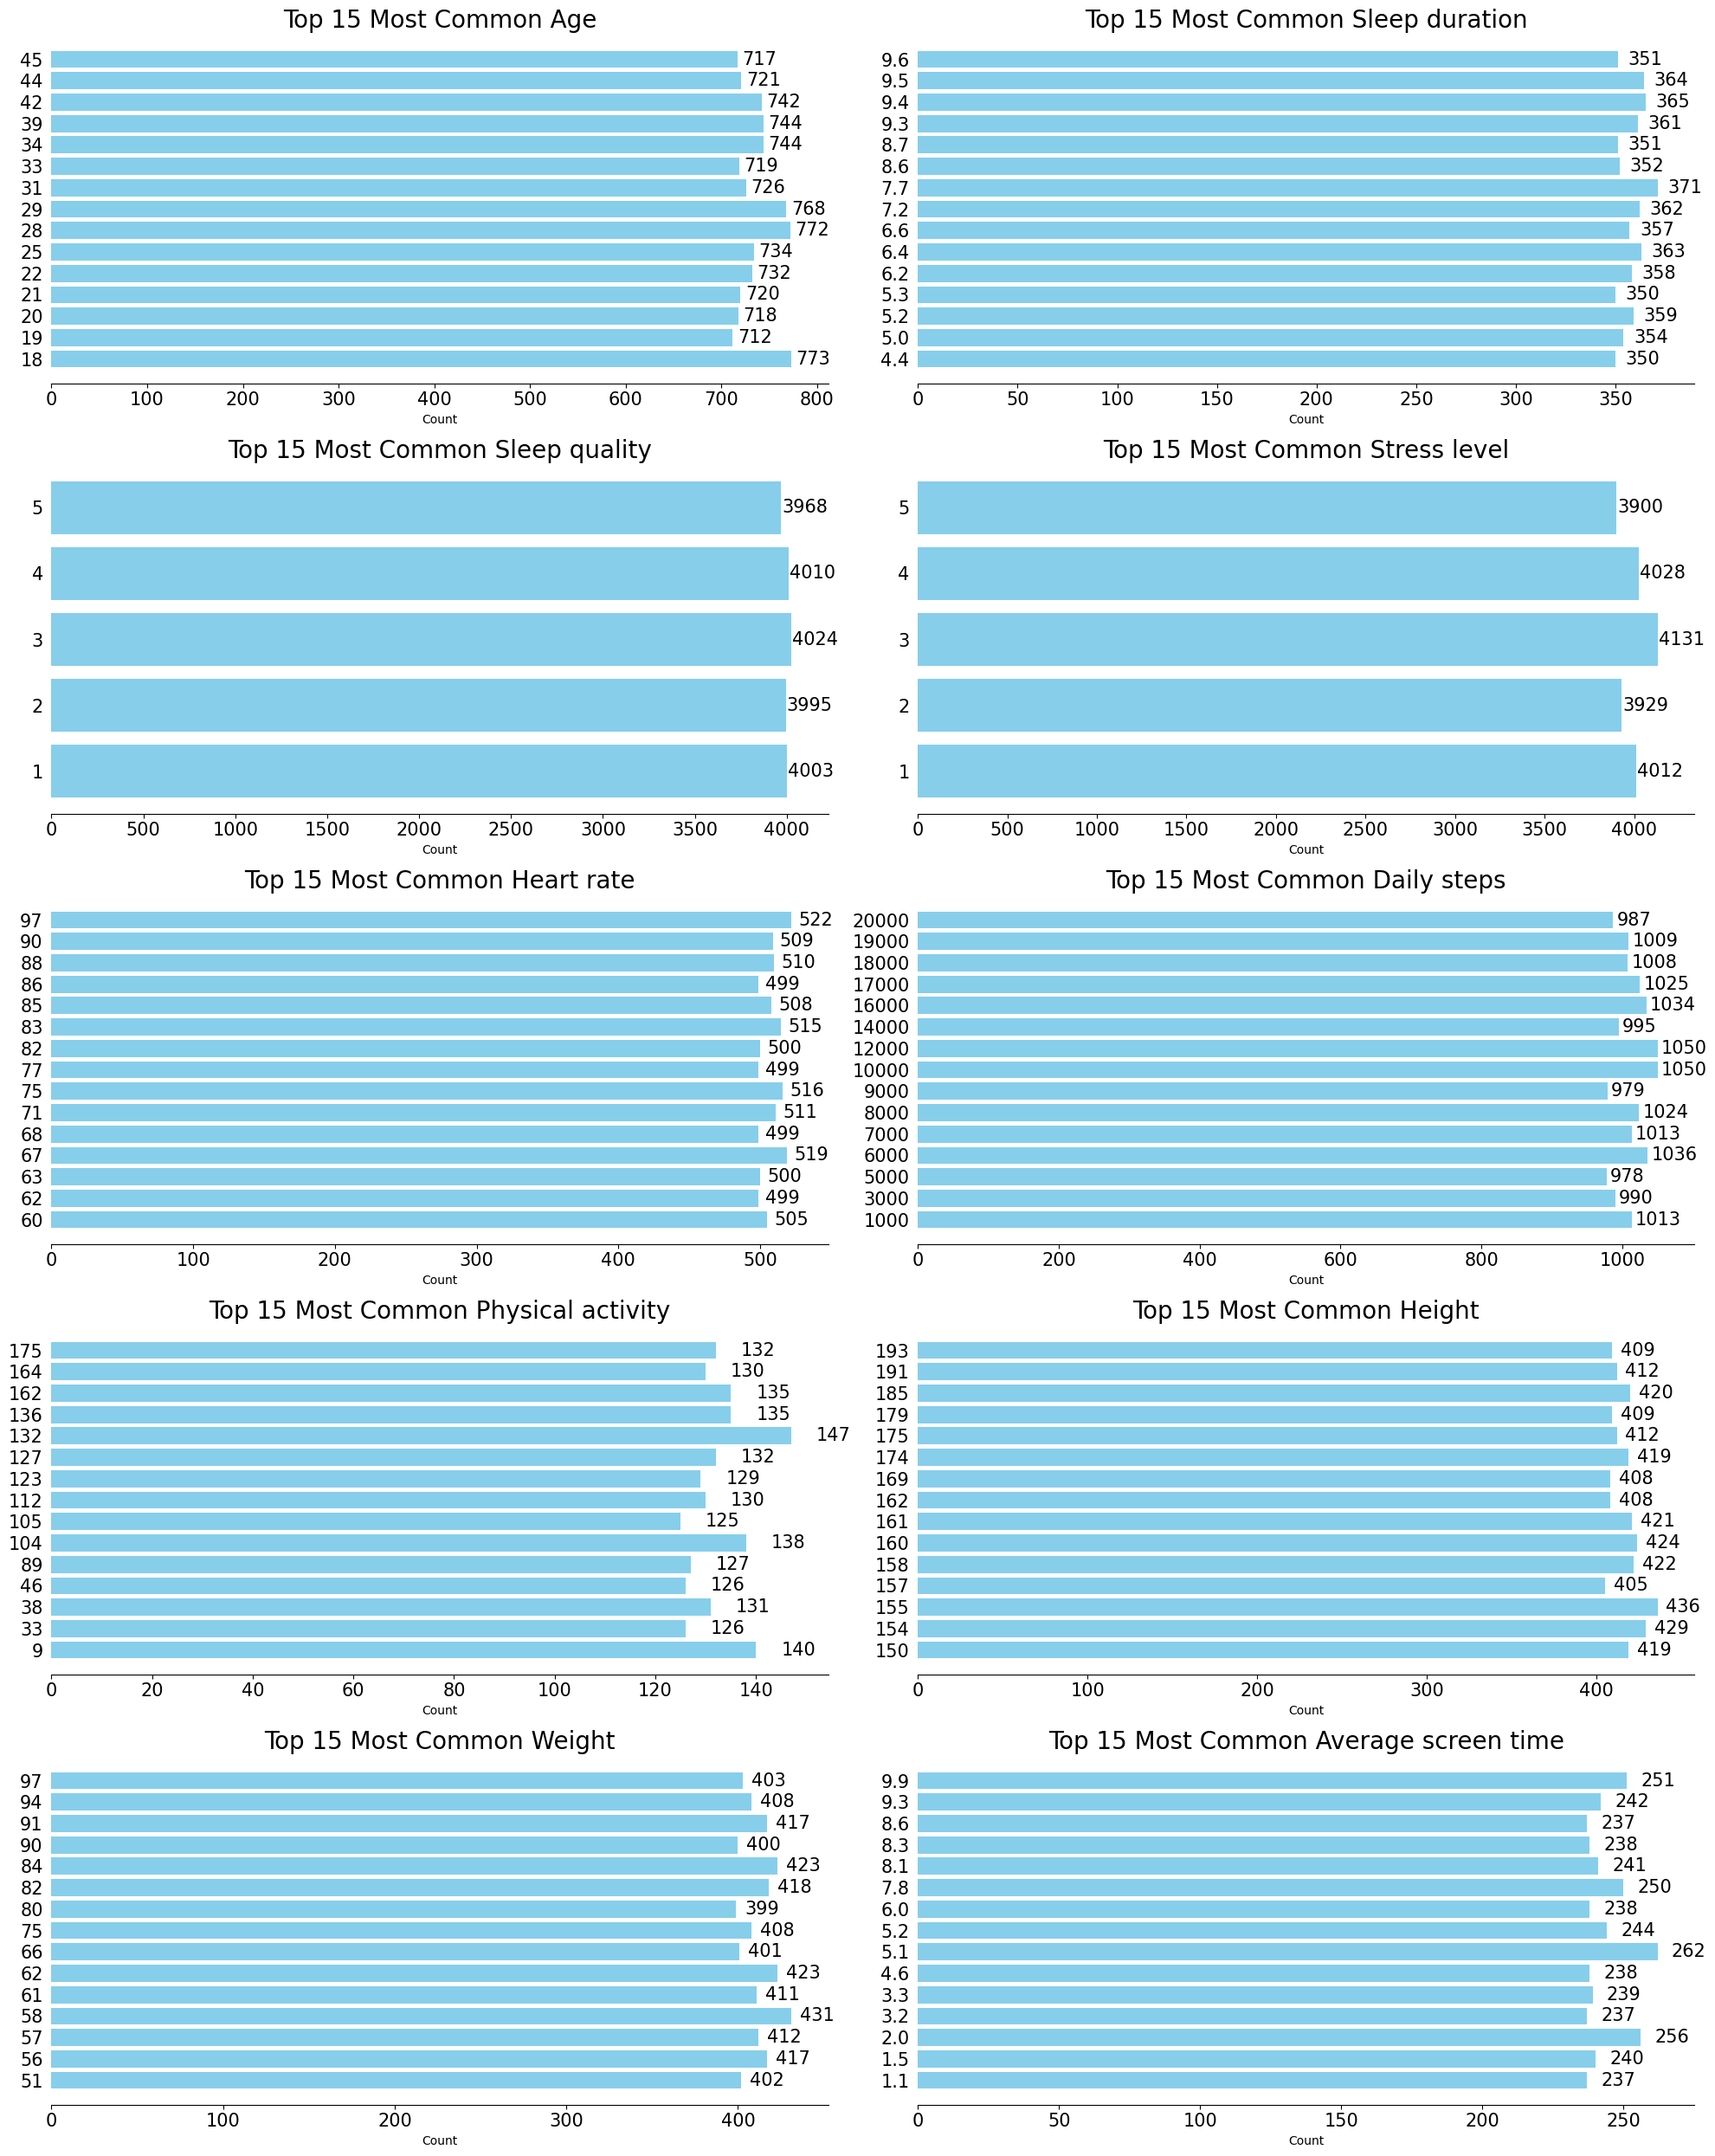

In [24]:
# Features to visualize
features = numerical_col
# Setup 5x2 subplot
fig, axs = plt.subplots(5, 2, figsize=(20, 25))
axs = axs.flatten()

# Loop through each feature
for i, feature in enumerate(features):
    # Get top 15 most common values
    top_15 = df[feature].value_counts().head(15)
    
    # Convert to DataFrame for easier manipulation
    temp_df = pd.DataFrame({
        'category': top_15.index,
        'count': top_15.values
    })
    
    # Here's the key change: Sort by category (the actual y-axis values) numerically
    # This ensures numerical values like ages, weights, etc. are ordered naturally
    temp_df = temp_df.sort_values('category', ascending=True)
    
    ax = axs[i]
    # Plot with the categories sorted numerically
    bars = ax.barh(temp_df['category'].astype(str), temp_df['count'], color='skyblue')
    
    # Add value labels to bars
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}',
                va='center', fontsize=15)
    
    # Formatting
    ax.set_title(f'Top 15 Most Common {feature.capitalize()}', fontsize=20)
    ax.set_xlabel('Count')
    ax.set_ylabel('')
    ax.tick_params(left=False, labelsize=15)
    sns.despine(ax=ax, left=True)

# Adjust layout
plt.tight_layout()
plt.show()

# Summary 

The balanced distributions across all numerical variables provide an excellent foundation for our analysis. There are no severely skewed variables that would require transformation, and we have comprehensive coverage across the range of each variable. This dataset structure will enable robust statistical analysis and modeling to identify key risk factors for dry eye disease.

In [28]:
# Identify columns with Y/N values 
y_n_columns = []
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is string type
        # Standardize case before checking
        values = set(df[col].astype(str).str.strip().str.upper())
        if 'Y' in values and 'N' in values:
            y_n_columns.append(col)

print(f"Columns with Y/N values: {y_n_columns}")

# Create a copy to avoid modifying the original dataframe
df_PP = df.copy()

# Convert Y/N columns to numeric (1/0)
for col in y_n_columns:
    # Standardize values before mapping
    df_PP[col] = df_PP[col].astype(str).str.strip().str.upper()
    df_PP[col] = df_PP[col].map({'Y': 1, 'N': 0})
    # Verify the mapping worked
    print(f"Converted {col}: {df_PP[col].value_counts().to_dict()}")

Columns with Y/N values: ['Sleep disorder', 'Wake up during night', 'Feel sleepy during day', 'Caffeine consumption', 'Alcohol consumption', 'Smoking', 'Medical issue', 'Ongoing medication', 'Smart device before bed', 'Blue-light filter', 'Discomfort Eye-strain', 'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease']
Converted Sleep disorder: {0: 10069, 1: 9931}
Converted Wake up during night: {0: 10000, 1: 10000}
Converted Feel sleepy during day: {0: 10178, 1: 9822}
Converted Caffeine consumption: {1: 10089, 0: 9911}
Converted Alcohol consumption: {1: 10009, 0: 9991}
Converted Smoking: {0: 10017, 1: 9983}
Converted Medical issue: {0: 10111, 1: 9889}
Converted Ongoing medication: {1: 10082, 0: 9918}
Converted Smart device before bed: {1: 10003, 0: 9997}
Converted Blue-light filter: {0: 10016, 1: 9984}
Converted Discomfort Eye-strain: {1: 10037, 0: 9963}
Converted Redness in eye: {0: 10129, 1: 9871}
Converted Itchiness/Irritation in eye: {0: 10063, 1: 9937}
Converted Dry Ey

In [31]:
df_PP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  int64  
 12  Wake up during night         20000 non-null  int64  
 13  Feel sleepy duri

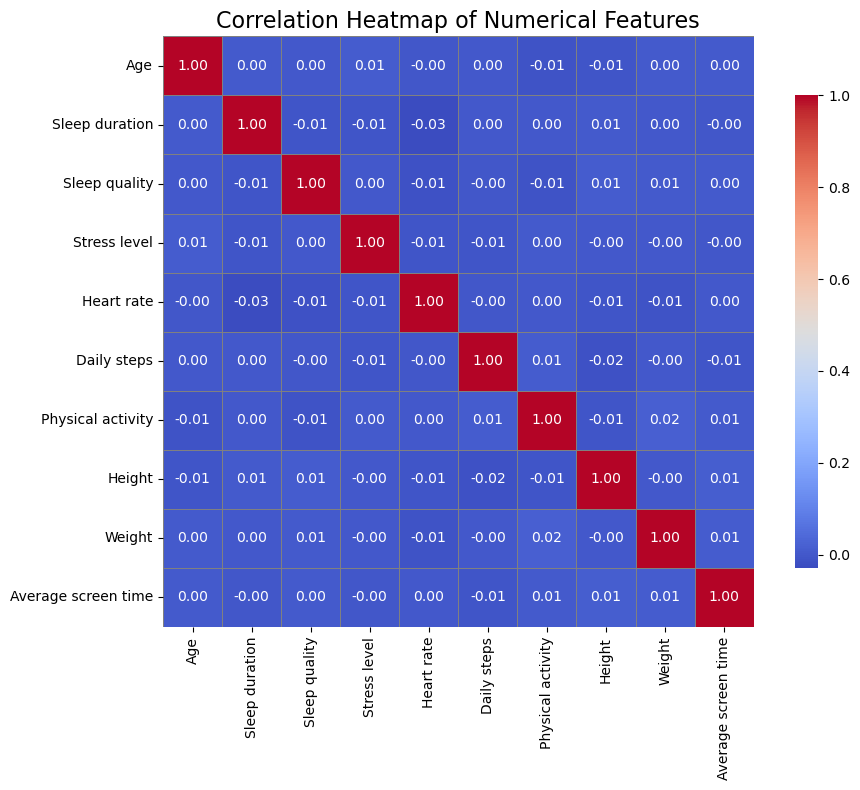

In [30]:
# Select numerical features
numerical_features = numerical_col
df_numerical = df[numerical_features]

# Compute the correlation matrix
corr_matrix = df_numerical.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 0.8})

# Add title
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

In [81]:
# Check for duplicates
duplicate_count = df_PP.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [82]:
pd.options.display.max_columns = None # Use this option to display all columns
df_PP.describe().style.format("{:.1f}")  # I use .style.format("{:.1f}") to make the output more concise

# Remember: "Y" = 1 and "N" = 0

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Sleep disorder,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
count,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0
mean,31.4,7.0,3.0,3.0,79.9,10536.9,90.1,174.9,74.9,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,5.5,0.5,0.5,0.5,0.5,0.7
std,8.1,1.7,1.4,1.4,11.8,5752.7,52.3,14.7,14.7,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,2.6,0.5,0.5,0.5,0.5,0.5
min,18.0,4.0,1.0,1.0,60.0,1000.0,0.0,150.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,24.0,5.5,2.0,2.0,70.0,6000.0,45.0,162.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3,0.0,0.0,0.0,0.0,0.0
50%,31.0,7.0,3.0,3.0,80.0,11000.0,91.0,175.0,75.0,0.0,0.5,0.0,1.0,1.0,0.0,0.0,1.0,1.0,5.5,0.0,1.0,0.0,0.0,1.0
75%,39.0,8.5,4.0,4.0,90.0,16000.0,135.0,188.0,88.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.8,1.0,1.0,1.0,1.0,1.0
max,45.0,10.0,5.0,5.0,100.0,20000.0,180.0,200.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,1.0,1.0,1.0,1.0,1.0


In [84]:
df_PP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  int64  
 12  Wake up during night         20000 non-null  int64  
 13  Feel sleepy duri

In [86]:
# Create a copy of UPDATED
# PP = Pre-Processed
df_PreProcessed = df_PP.copy()

df_PP.to_csv('Dry_Eye_Dataset_Pre-Processed.csv', index=False)
print("\nPre-Processed dataset saved to 'Dry_Eye_Dataset_Pre-Processed.csv'")


Pre-Processed dataset saved to 'Dry_Eye_Dataset_Pre-Processed.csv'
